In [4]:
## Import Required library
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import fnmatch

In [13]:
## Working Directory
os.chdir('F:\\Northeastern University\\sem2\\data mining\\project\\final')
cwd = os.getcwd()
print(cwd)

F:\Northeastern University\sem2\data mining\project\final


In [14]:
## Reading the csv file
df = pd.DataFrame()
df = pd.read_csv('DSI_kickstarterscrape_dataset1.csv')
print(df.head())

   project id                                               name  \
0       39409                              WHILE THE TREES SLEEP   
1      126581               Educational Online Trading Card Game   
2      138119                                              STRUM   
3      237090  GETTING OVER - One son's search to finally kno...   
4      246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   
2  http://www.kickstarter.com/projects/185476022/...  Film & Video   
3  http://www.kickstarter.com/projects/charnick/g...  Film & Video   
4  http://www.kickstarter.com/projects/flyegrlroy...       Fashion   

          subcategory         location      status     goal  pledged  \
0          Short Film     Columbia, MO  successful  10500.0  11545.0   
1  Board & Card Games    M

In [15]:
## Dimension
print(df.shape)
print(df.dtypes)

(45957, 17)
project id             int64
name                  object
url                   object
category              object
subcategory           object
location              object
status                object
goal                 float64
pledged              float64
funded percentage    float64
backers                int64
funded date           object
levels                 int64
reward levels         object
updates                int64
comments               int64
duration             float64
dtype: object


In [16]:
## Removing unwanted rows:
print(df.status.value_counts())

df.drop(df.loc[df['status']=='live'].index, inplace=True)
df.drop(df.loc[df['status']=='canceled'].index, inplace=True)
df.drop(df.loc[df['status']=='suspended'].index, inplace=True)

successful    22969
failed        18996
live           3929
canceled         59
suspended         4
Name: status, dtype: int64


In [17]:
## Spliting the column into two:
new = df["location"].str.split(", ", n = 1, expand = True)
df["city"]= new[0]
df["state"]= new[1]
df.drop(columns =["location"], inplace = True)

print(df.shape)

(41965, 18)


In [18]:
##Filtering states
for each in df.state:
    if (fnmatch.fnmatch(str(each),'??')) == False:
        df.drop(df.loc[df['state']== each].index, inplace=True)

In [19]:
print(df.shape)


(39855, 18)


In [20]:
## Checking for missing values:
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

print(df.shape)

project id              0
name                    0
url                     0
category                0
subcategory             0
status                  0
goal                    0
pledged                 0
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          57
updates                 0
comments                0
duration                0
city                 1322
state                1323
dtype: int64
project id           0
name                 0
url                  0
category             0
subcategory          0
status               0
goal                 0
pledged              0
funded percentage    0
backers              0
funded date          0
levels               0
reward levels        0
updates              0
comments             0
duration             0
city                 0
state                0
dtype: int64
(38491, 18)


In [21]:
## Finding Main Category, Sub Category and number of states:
print(len(df.category.unique()), "Main categories\n")
print(df.category.value_counts())
print(len(df.subcategory.unique()), "sub categories\n")
print(df.subcategory.value_counts())
print(len(df.state.unique()), "Number of states\n")
print(df.state.value_counts())

14 Main categories

Film &amp; Video    10925
Music                9559
Publishing           3778
Art                  3263
Theater              2196
Design               1450
Games                1365
Food                 1243
Photography          1110
Fashion               975
Comics                913
Technology            654
Dance                 649
Film & Video          411
Name: category, dtype: int64
51 sub categories

Short Film                3517
Documentary               3060
Music                     2876
Theater                   2196
Film &amp; Video          2162
Indie Rock                1732
Rock                      1584
Narrative Film            1294
Food                      1243
Photography               1110
Fashion                    975
Webseries                  960
Comics                     913
Fiction                    885
Art                        872
Product Design             850
Nonfiction                 789
Country &amp; Folk         715
Video Game

In [22]:
### Implementing Random Forest Algorithm:

## Converting categorical data into numerical data:
df.category = pd.Categorical(df.category).codes
df.state = pd.Categorical(df.state).codes
df.city = pd.Categorical(df.city).codes
df.subcategory = pd.Categorical(df.subcategory).codes
df.status = pd.Categorical(df.status).codes


In [23]:
## Dividing into training and test data set
y1 = df['status']
df2 = df[['category','subcategory','city','state','goal','levels','duration','updates']]
x_trn, x_tst, y_trn, y_tst = train_test_split(df2,y1, test_size = 0.25)


In [24]:
## Random Forest Classifier Model
clf = RandomForestClassifier( n_estimators = 500)

In [26]:
## Train the model using training data set
clf.fit(x_trn, y_trn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
## Prediction on test data set
y_pred = clf.predict(x_tst)

In [28]:
## Model Accuracy:
cfm = metrics.confusion_matrix(y_tst,y_pred)
acc = metrics.accuracy_score(y_tst, y_pred)
f1_score = metrics.f1_score(y_tst,y_pred)
report = metrics.classification_report(y_tst,y_pred)
print("Confusion  Matrix", cfm)
print("Accuracy:",acc*100)
print("Error:", (1 - acc)*100)
print("F1 Score:",f1_score)
print("Classfication Report:",report)

Confusion  Matrix [[3415 1025]
 [ 791 4392]]
Accuracy: 81.12854619141639
Error: 18.871453808583606
F1 Score: 0.8286792452830188
Classfication Report:               precision    recall  f1-score   support

           0       0.81      0.77      0.79      4440
           1       0.81      0.85      0.83      5183

   micro avg       0.81      0.81      0.81      9623
   macro avg       0.81      0.81      0.81      9623
weighted avg       0.81      0.81      0.81      9623



In [29]:
## Important features selection for Model:
imp_feature = pd.Series(clf.feature_importances_,index = df2.columns.values).sort_values(ascending=False)
print(imp_feature)

updates        0.330535
goal           0.165968
duration       0.116413
city           0.098537
levels         0.084860
subcategory    0.074883
state          0.073018
category       0.055786
dtype: float64


No handles with labels found to put in legend.


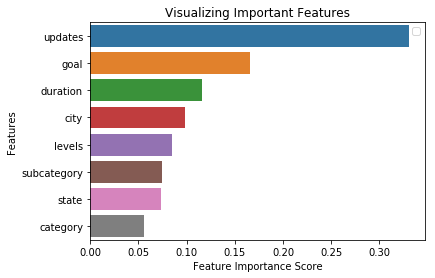

In [30]:
## Visualization of feature selection score
sns.barplot(x=imp_feature, y=imp_feature.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [31]:
### Model with selected features

## Dividing the data set into training and test data
y2 = df['status']
df3 = df[['updates','subcategory','city','goal','levels','duration']]
x_trn, x_tst, y_trn, y_tst = train_test_split(df3,y2, test_size = 0.25)

In [32]:
## Random Forest Classifier Model
clf = RandomForestClassifier( n_estimators = 500)

In [33]:
## Train the model using training data set
clf.fit(x_trn, y_trn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
## Prediction on test data set
y_pred = clf.predict(x_tst)

In [35]:
## Model Accuracy and F1-Score
cfm = metrics.confusion_matrix(y_tst,y_pred)
acc = metrics.accuracy_score(y_tst, y_pred)
f1 = metrics.f1_score(y_tst,y_pred)
report = metrics.classification_report(y_tst,y_pred)
print("Confusion  Matrix", cfm)
print("Accuracy:",acc*100)
print("Error:", (1 - acc)*100)
print("F1 Score:",f1)
print("Classfication Report:",report)

Confusion  Matrix [[3300 1070]
 [ 885 4368]]
Accuracy: 79.68409020056116
Error: 20.31590979943885
F1 Score: 0.8171359087082593
Classfication Report:               precision    recall  f1-score   support

           0       0.79      0.76      0.77      4370
           1       0.80      0.83      0.82      5253

   micro avg       0.80      0.80      0.80      9623
   macro avg       0.80      0.79      0.79      9623
weighted avg       0.80      0.80      0.80      9623

